In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

def load_cifar_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
    return data, labels

def load_all_cifar_batches(cifar_dir):

    all_data = []
    all_labels = []
    for i in range(1, 6):  # CIFAR-10 has 5 training batches
        batch_file = os.path.join(cifar_dir, f'data_batch_{i}')
        data, labels = load_cifar_batch(batch_file)
        all_data.append(data)
        all_labels.extend(labels)  # Use extend to create a single list of labels
    return np.vstack(all_data), np.array(all_labels)

# Path to the CIFAR-10 folder
cifar_dir = 'C:\cifar-10-batches-py' 

# Load all batches
data, labels = load_all_cifar_batches(cifar_dir)

print("Data shape:", data.shape) 
print("Labels length:", len(labels)) 


<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\syedj\AppData\Local\Temp\ipykernel_2564\1317233408.py:20: SyntaxWarning: invalid escape sequence '\c'
  cifar_dir = 'C:\cifar-10-batches-py'


Data shape: (50000, 3072)
Labels length: 50000


# Data Preprocessing

In [6]:
# Normalize the pixel values
data = data / 255.0

# Reshape the data
data = data.reshape(-1, 32, 32, 3)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape) 
print("Validation data shape:", X_val.shape)  
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Training labels shape: (40000,)
Validation labels shape: (10000,)


# CNN:

In [7]:
# Define the CNN model
model = Sequential([
    Input(shape=(32, 32, 3)), 
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │              

 Total params: 846,634 (3.23 MB)

 Trainable params: 846,186 (3.23 MB)

 Non-trainable params: 448 (1.75 KB)

# Model Training

In [8]:
# Train the model
history = model.fit(X_train, y_train ,       
                    epochs=20, 
                    batch_size=64, 
                    validation_data=(X_val, y_val))
                                                   

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 326ms/step - accuracy: 0.1450 - loss: 2.3585 - val_accuracy: 0.2800 - val_loss: 1.9051
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 264s 329ms/step - accuracy: 0.2402 - loss: 1.9681 - val_accuracy: 0.3233 - val_loss: 1.7960
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 329ms/step - accuracy: 0.3169 - loss: 1.8019 - val_accuracy: 0.3518 - val_loss: 1.7688
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 331ms/step - accuracy: 0.3964 - loss: 1.6402 - val_accuracy: 0.4683 - val_loss: 1.4912
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 250s 312ms/step - accuracy: 0.4620 - loss: 1.4943 - val_accuracy: 0.5072 - val_loss: 1.4204
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 329ms/step - accuracy: 0.5061 - loss: 1.4128 - val_accuracy: 0.5413 - val_loss: 1.3345
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 308ms/step - accuracy: 0.5356 - loss: 1.3328 - val_accuracy: 0.5102 - val_loss: 1.3527
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 310ms/step - accuracy: 0.5635 -

## Load Test_data

In [9]:
def load_test_batch(cifar_dir):
    test_batch_file = os.path.join(cifar_dir, 'test_batch')
    data, labels = load_cifar_batch(test_batch_file)
    return data, labels


test_data, test_labels = load_test_batch(cifar_dir)
test_data = test_data.reshape(-1, 32, 32, 3)

### Test_Data normalization

In [10]:
# Normalize the data
test_data = test_data / 255.0
# Reshape first
test_data = test_data.reshape(-1, 32, 32, 3)

test_labels = np.array(test_labels)

test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.6447 - loss: 1.0773
Test Accuracy: 0.6456


In [11]:
# 2. Make predictions on the test data
test_predictions = model.predict(test_data)


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step


### Precision,Recall,F1 score

In [12]:
predicted_labels = np.argmax(model.predict(test_data), axis=1)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
Precision: 0.6767
Recall: 0.6456
F1 Score: 0.6453


# Train_data & Validation_data visualization

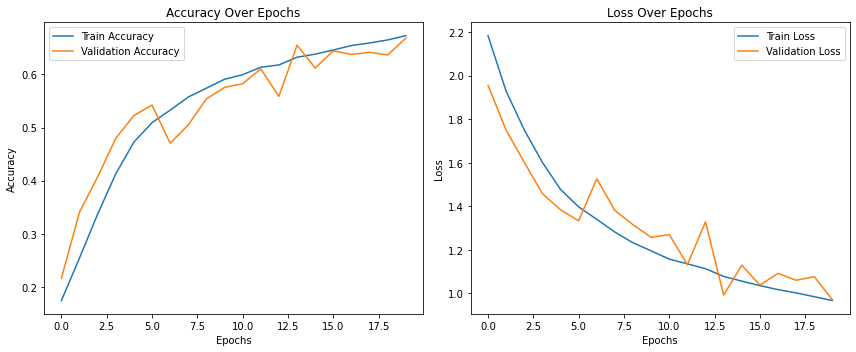

In [10]:
# Accuracy and Loss Over Epochs
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Confusion Matrix

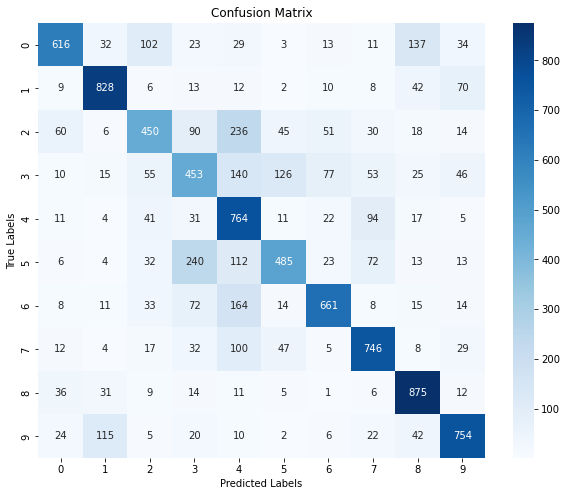

In [11]:

cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Test_data visualization

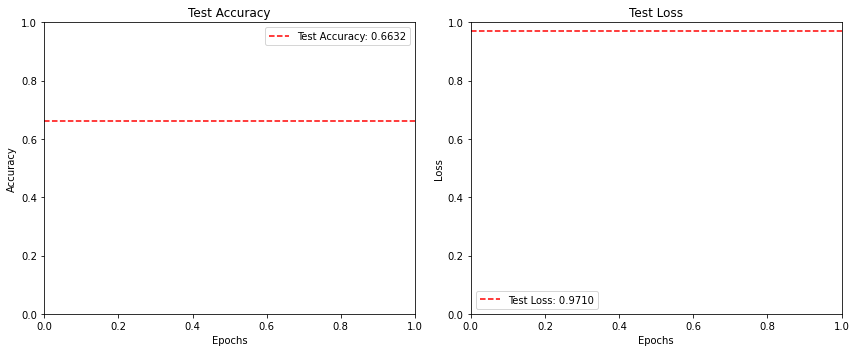

In [12]:

# Create a figure for the plots
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.axhline(test_accuracy, color='red', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.axhline(test_loss, color='red', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Fine Tuning
## Augmentation and regularization methods

# CNN with regularizations:

In [14]:
model = Sequential([
    Input(shape=(32, 32, 3)), 
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Augmentation

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)


# Model Training after augmentation

In [14]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=80,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/80


C:\Users\syedj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 311ms/step - accuracy: 0.3707 - loss: 1.8081 - val_accuracy: 0.4849 - val_loss: 1.4785
Epoch 2/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 321ms/step - accuracy: 0.4485 - loss: 1.5822 - val_accuracy: 0.5006 - val_loss: 1.5881
Epoch 3/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 319ms/step - accuracy: 0.4707 - loss: 1.5376 - val_accuracy: 0.4568 - val_loss: 1.8186
Epoch 4/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 318ms/step - accuracy: 0.4816 - loss: 1.5067 - val_accuracy: 0.4823 - val_loss: 1.6700
Epoch 5/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 323ms/step - accuracy: 0.4944 - loss: 1.4643 - val_accuracy: 0.5415 - val_loss: 1.4158
Epoch 6/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 324ms/step - accuracy: 0.5014 - loss: 1.4657 - val_accuracy: 0.5337 - val_loss: 1.3503
Epoch 7/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 318ms/step - accuracy: 0.5062 - loss: 1.4410 - val_accuracy: 0.5103 - val_loss: 1.5130
Epoch 8/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 324ms/step - accuracy: 0.5068 - loss: 1.42

625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.5749 - loss: 1.5296 - val_accuracy: 0.5593 - val_loss: 1.6003
Epoch 51/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 212ms/step - accuracy: 0.5760 - loss: 1.5336 - val_accuracy: 0.5526 - val_loss: 1.6307
Epoch 52/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.5775 - loss: 1.5266 - val_accuracy: 0.5138 - val_loss: 1.8315
Epoch 53/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 212ms/step - accuracy: 0.5764 - loss: 1.5278 - val_accuracy: 0.5436 - val_loss: 1.6300
Epoch 54/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 15983s 26s/step - accuracy: 0.5711 - loss: 1.5425 - val_accuracy: 0.5363 - val_loss: 1.6930
Epoch 55/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 145ms/step - accuracy: 0.5706 - loss: 1.5378 - val_accuracy: 0.5441 - val_loss: 1.6919
Epoch 56/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.5717 - loss: 1.5392 - val_accuracy: 0.4746 - val_loss: 2.2084
Epoch 57/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 161ms/step - accuracy: 0.5748 - loss

# Test_Data

In [15]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6267 - loss: 1.1898
Test Accuracy: 0.6257
